In [2]:
# ================== Telco Customer Churn Prediction ==================

In [22]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
# ----------------- 1. Load Dataset -----------------

In [24]:
df = pd.read_csv(r"E:\Telco_Customer_Project\customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
# Check null values

In [26]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [27]:
# ----------------- 2. Data Cleaning -----------------

In [28]:
# Drop customerID (not useful for prediction)

In [29]:
df.drop("customerID", axis=1, inplace=True)

In [30]:
# Convert TotalCharges to numeric and handle missing values

In [31]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

In [32]:
# Encode Churn as 1/0

In [33]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [34]:
# ----------------- 3. EDA (Exploratory Data Analysis) -----------------

In [35]:
# Churn Distribution

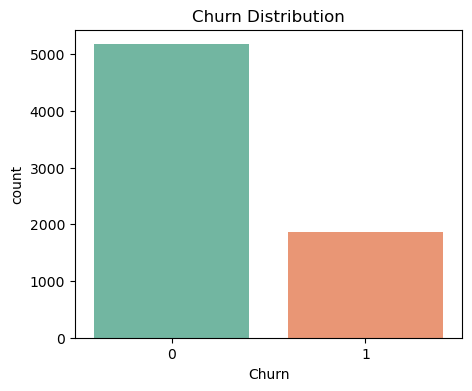

In [36]:
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.show()

In [37]:
# Numerical Features Distribution

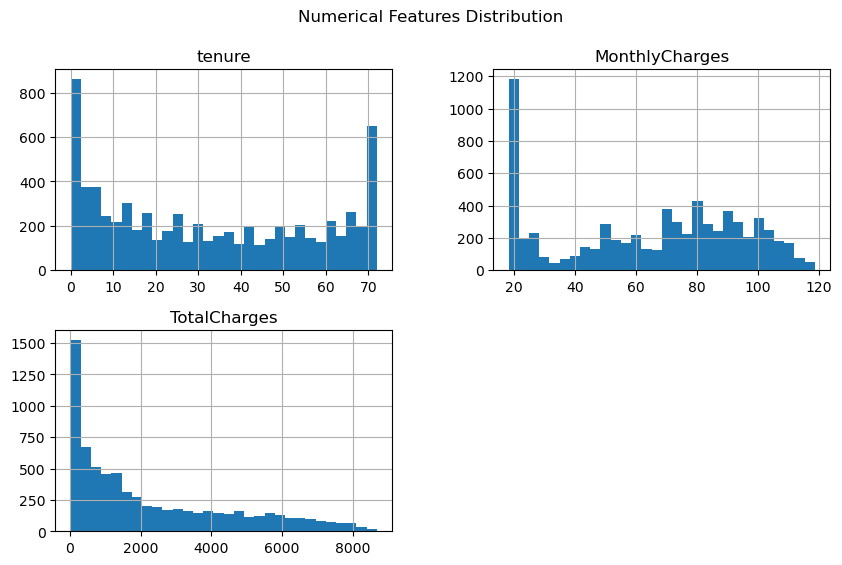

In [38]:
df[['tenure','MonthlyCharges','TotalCharges']].hist(bins=30, figsize=(10,6))
plt.suptitle("Numerical Features Distribution")
plt.show()

In [39]:
# Churn by Contract

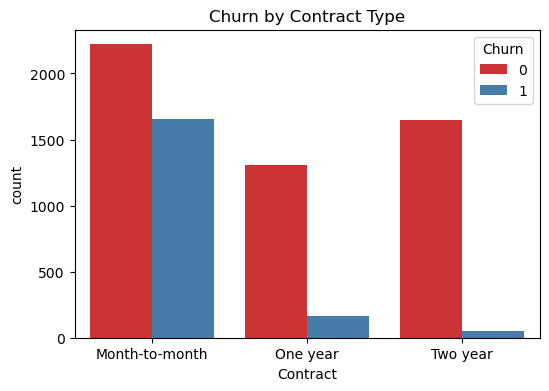

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title("Churn by Contract Type")
plt.show()

In [41]:
# ----------------- 4. Feature Encoding -----------------

In [42]:
# Encode categorical variables

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
df[df.select_dtypes(include='object').columns] = df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

In [45]:
# ----------------- 5. Train-Test Split -----------------

In [46]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=555)

In [47]:
df_train_x = df_train.iloc[:, 0:-1]
df_train_y = df_train.iloc[:, -1]
df_test_x  = df_test.iloc[:, 0:-1]
df_test_y  = df_test.iloc[:, -1]


In [48]:
from sklearn.metrics import *

In [49]:
# ----------------- 6. Model Training -----------------

In [50]:
# Train Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier()
rfc.fit(df_train_x, df_train_y)

RandomForestClassifier()

In [53]:
# Predict
pred_rfc = rfc.predict(df_test_x)

In [54]:
# ----------------- 7. Evaluation -----------------

In [55]:
tab = confusion_matrix(df_test_y, pred_rfc)
print("Confusion Matrix:\n", tab)
print("Accuracy:", accuracy_score(df_test_y, pred_rfc))
print("F1 Score:", f1_score(df_test_y, pred_rfc))
print("Recall:", recall_score(df_test_y, pred_rfc))
print("Precision:", precision_score(df_test_y, pred_rfc))

Confusion Matrix:
 [[931 113]
 [187 178]]
Accuracy: 0.78708303761533
F1 Score: 0.5426829268292683
Recall: 0.4876712328767123
Precision: 0.6116838487972509


In [56]:
# ----------------- 8. Save Model -----------------

In [57]:
import pickle

In [58]:
pickle.dump(rfc, open(r"E:\Telco_Customer_Project\customer_churn.pkl", 'wb'))

In [59]:
import sys

In [60]:
# Python executable path

In [61]:
print("Python Path:", sys.executable)

Python Path: C:\ProgramData\anaconda3\python.exe
